In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import seaborn as sb

In [2]:
credit_df = pd.read_csv( r'C:\Users\rajan\Downloads\german-credit.data', delim_whitespace = True, header = None)

In [3]:
credit_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1


In [4]:
columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
           'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
           'other_debtors', 'residing_since', 'property', 'age',
           'inst_plans', 'housing', 'num_credits',
           'job', 'dependents', 'telephone', 'foreign_worker', 'status']

In [5]:
credit_df.columns = columns

In [6]:
credit_df = pd.get_dummies(credit_df, drop_first = True)
credit_df

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status,checkin_acc_A11,checkin_acc_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,1,4,7,10,12,15,17,20,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,1169,4,4,67,2,1,1,1,0,...,1,0,0,0,1,0,0,1,1,0
2,48,5951,2,2,22,1,1,2,0,1,...,1,0,0,0,1,0,1,0,1,0
3,12,2096,2,3,49,1,2,1,0,0,...,1,0,0,1,0,0,1,0,1,0
4,42,7882,2,4,45,1,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,12,1736,3,4,31,1,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0
997,30,3857,4,4,40,1,1,1,1,0,...,1,0,0,0,0,1,0,1,1,0
998,12,804,4,4,38,1,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0
999,45,1845,4,4,23,1,1,2,1,0,...,0,1,0,0,1,0,0,1,1,0


In [7]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   duration               1001 non-null   int64
 1   amount                 1001 non-null   int64
 2   inst_rate              1001 non-null   int64
 3   residing_since         1001 non-null   int64
 4   age                    1001 non-null   int64
 5   num_credits            1001 non-null   int64
 6   dependents             1001 non-null   int64
 7   status                 1001 non-null   int64
 8   checkin_acc_A11        1001 non-null   uint8
 9   checkin_acc_A12        1001 non-null   uint8
 10  checkin_acc_A13        1001 non-null   uint8
 11  checkin_acc_A14        1001 non-null   uint8
 12  credit_history_A30     1001 non-null   uint8
 13  credit_history_A31     1001 non-null   uint8
 14  credit_history_A32     1001 non-null   uint8
 15  credit_history_A33     1001 non-null  

In [8]:
credit_df.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status,checkin_acc_A11,checkin_acc_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.00000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,20.883117,3267.994006,2.977023,2.852148,35.522478,1.420579,1.170829,1.318681,0.273726,0.268731,...,0.712288,0.107892,0.021978,0.19980,0.629371,0.147852,0.595405,0.403596,0.962038,0.036963
std,12.069189,2823.214469,1.125376,1.126107,11.394110,0.719678,0.617890,0.747891,0.446093,0.443521,...,0.452923,0.310399,0.146685,0.40005,0.483215,0.355131,0.491059,0.490864,0.191200,0.188765
min,1.000000,4.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1364.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,2319.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,24.000000,3972.000000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,72.000000,18424.000000,7.000000,10.000000,75.000000,15.000000,17.000000,20.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


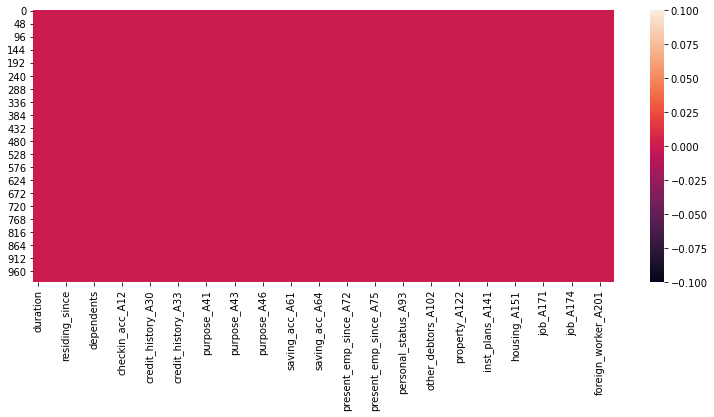

In [9]:
sns.heatmap(credit_df.isnull())
fig=plt.gcf()
fig.set_size_inches(13,5)

In [10]:
credit_df[credit_df.isnull()].count()

duration               0
amount                 0
inst_rate              0
residing_since         0
age                    0
                      ..
job_A174               0
telephone_A191         0
telephone_A192         0
foreign_worker_A201    0
foreign_worker_A202    0
Length: 62, dtype: int64

In [11]:
print(credit_df.nunique())
print(credit_df.head())

duration                34
amount                 922
inst_rate                5
residing_since           5
age                     54
                      ... 
job_A174                 2
telephone_A191           2
telephone_A192           2
foreign_worker_A201      2
foreign_worker_A202      2
Length: 62, dtype: int64
   duration  amount  inst_rate  residing_since  age  num_credits  dependents  \
0         1       4          7              10   12           15          17   
1         6    1169          4               4   67            2           1   
2        48    5951          2               2   22            1           1   
3        12    2096          2               3   49            1           2   
4        42    7882          2               4   45            1           2   

   status  checkin_acc_A11  checkin_acc_A12  ...  housing_A152  housing_A153  \
0      20                0                0  ...             0             0   
1       1                1           

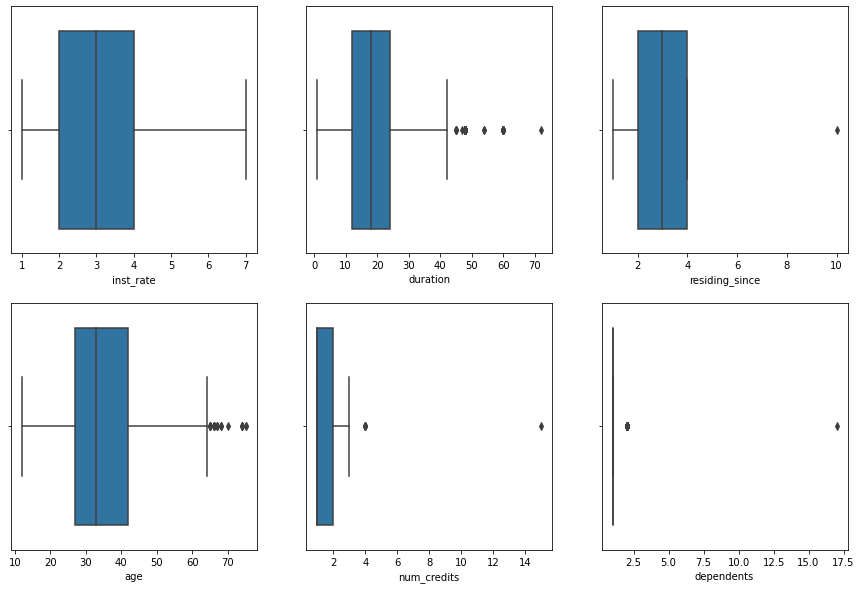

In [12]:
fig, axes = plt.subplots(2,3,figsize=(15,10))

sb.boxplot(x="inst_rate", data=credit_df, ax=axes[0, 0])
sb.boxplot(x="duration", data=credit_df, ax=axes[0, 1])
sb.boxplot(x="residing_since", data=credit_df, ax=axes[0, 2])
sb.boxplot(x="age", data=credit_df, ax=axes[1, 0])
sb.boxplot(x="num_credits", data=credit_df, ax=axes[1, 1])
sb.boxplot(x="dependents", data=credit_df, ax=axes[1, 2])


plt.show()

In [13]:
credit_df = credit_df[credit_df.duration <= 43]
credit_df = credit_df[credit_df.age <= 55]
credit_df = credit_df[credit_df.dependents <= 1]
# X = X[X.duration <= 43]

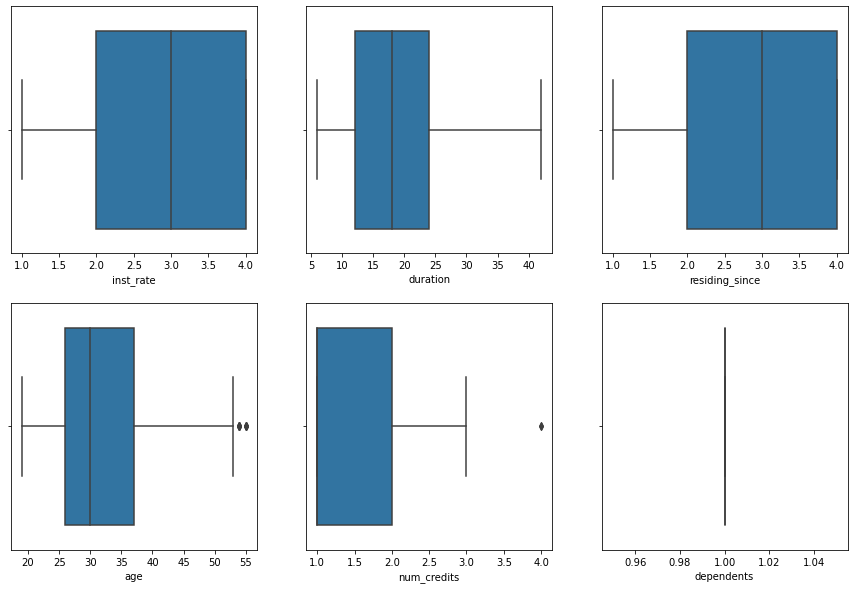

In [14]:
fig, axes = plt.subplots(2,3,figsize=(15,10))

sb.boxplot(x="inst_rate", data=credit_df, ax=axes[0, 0])
sb.boxplot(x="duration", data=credit_df, ax=axes[0, 1])
sb.boxplot(x="residing_since", data=credit_df, ax=axes[0, 2])
sb.boxplot(x="age", data=credit_df, ax=axes[1, 0])
sb.boxplot(x="num_credits", data=credit_df, ax=axes[1, 1])
sb.boxplot(x="dependents", data=credit_df, ax=axes[1, 2])


plt.show()

In [15]:
corr_analysis = credit_df.corr()

In [16]:
sb.set(rc={"figure.figsize":(50,17)})

<AxesSubplot:>

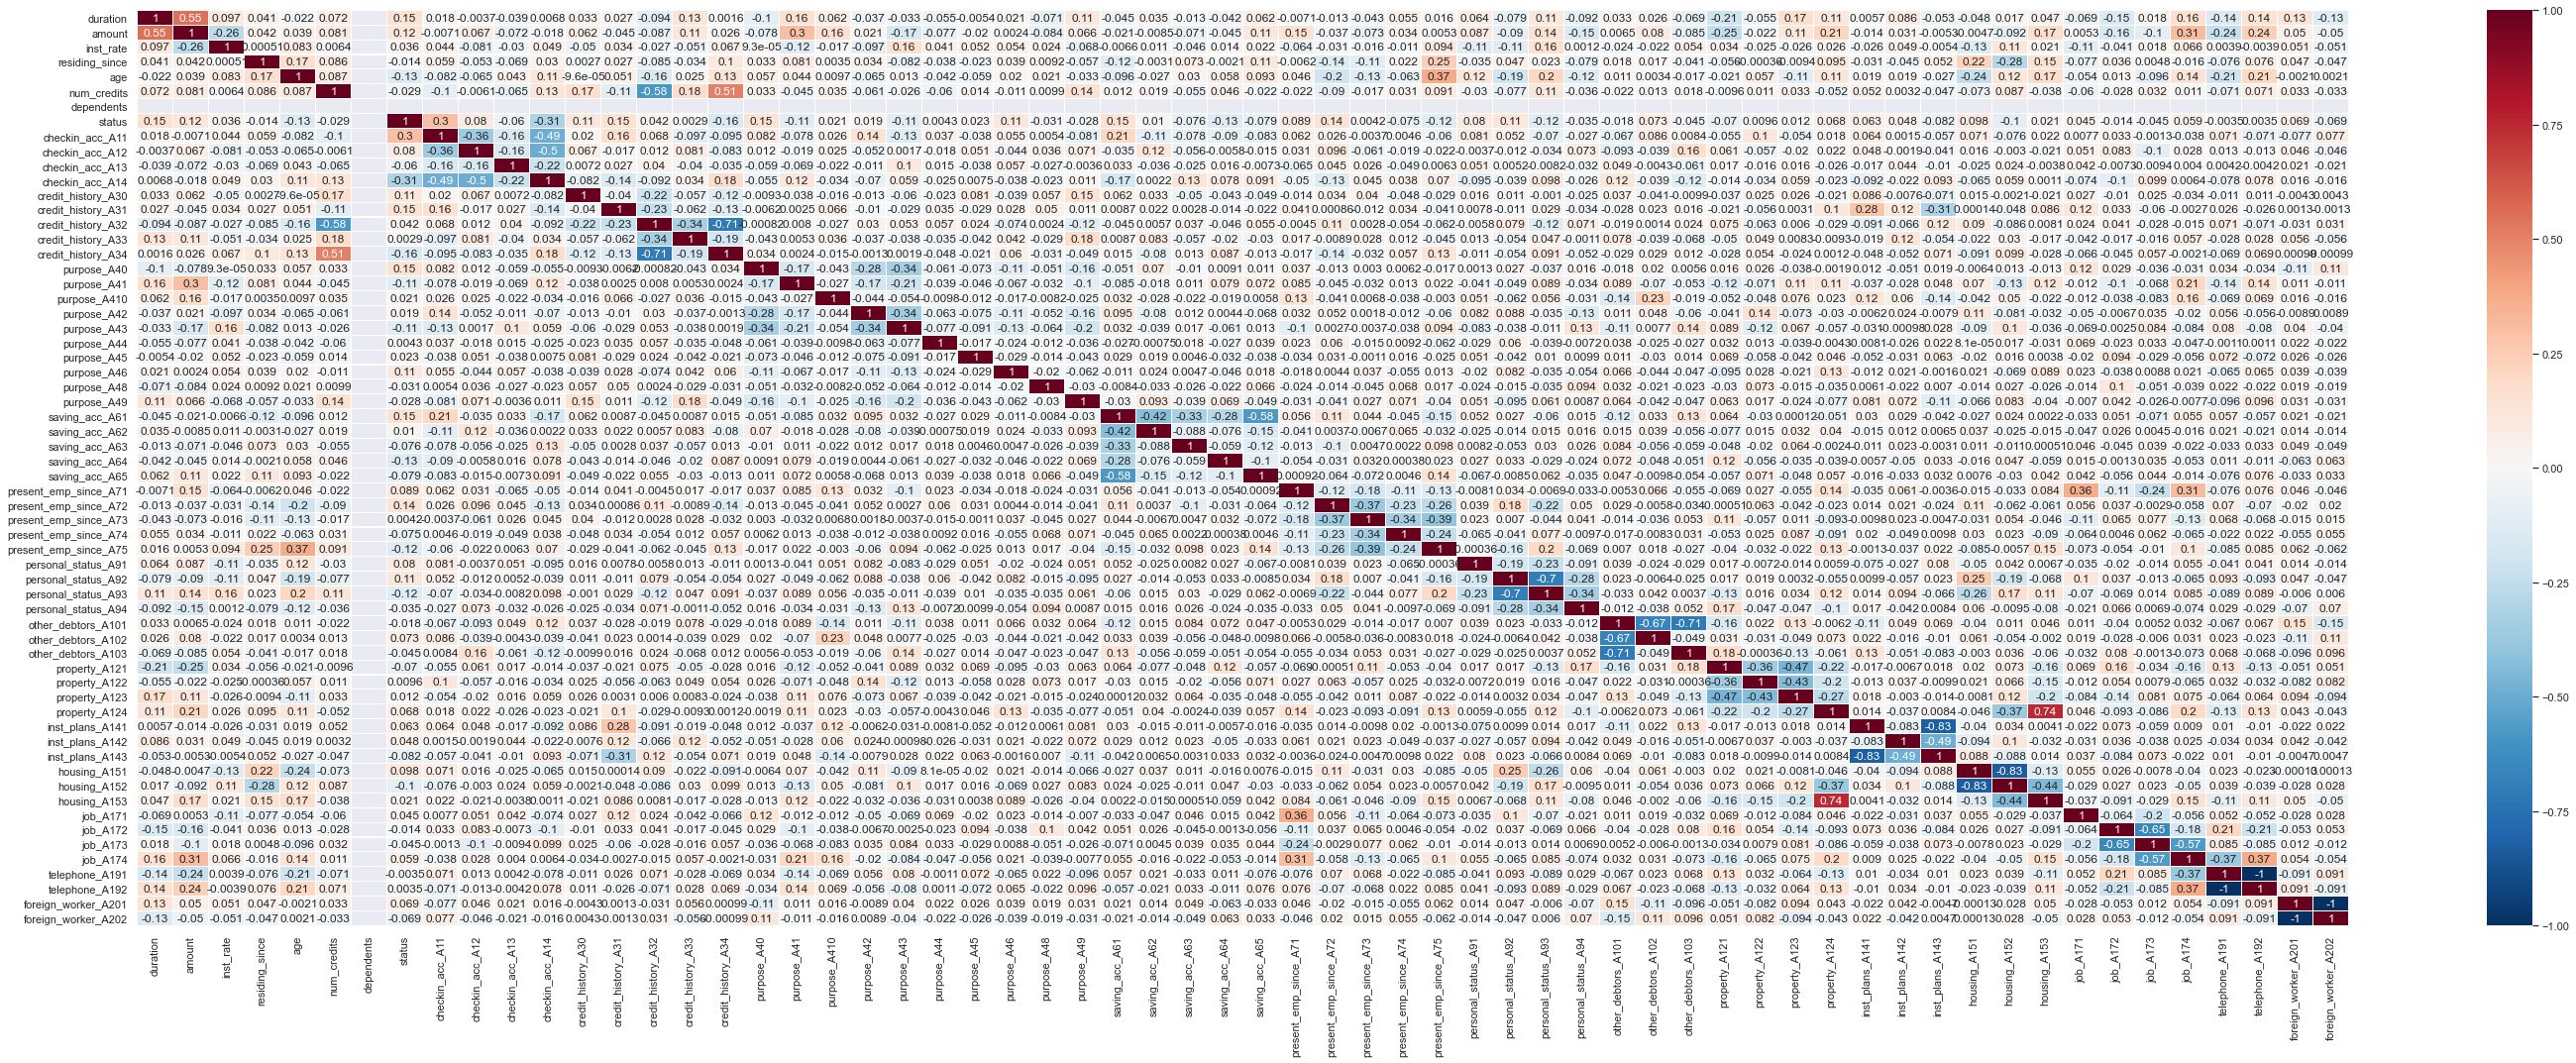

In [17]:
sb.heatmap(corr_analysis,
            xticklabels=corr_analysis.columns,
            yticklabels=corr_analysis.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.1)

In [ ]:
max_duration = np.amax(credit_df["duration"])
max_amount = np.amax(credit_df["amount"])
max_inst_rate = np.amax(credit_df["inst_rate"])
max_residing_since = np.amax(credit_df["residing_since"])

